In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Olympic Dataset Analysis


This project focuses on analyzing Olympic data to uncover key insights. The process begins with creating a DataFrame from a CSV file and merging regional information from the noc_region table with the events table to enhance the dataset. The analysis progresses through data gathering, cleaning, and exploratory data analysis (EDA) to ensure data quality and discover trends. Finally, conclusions are drawn to provide meaningful observations about the Olympic events and their regional contexts.

In [5]:
df1 = pd.read_csv('Downloads/events1 - athlete_events - Copy.csv')

In [6]:
df1.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [7]:
df1.shape

(271116, 15)

This dataset provides details on Olympic athletes, their demographics, the teams they represent, the events they participate in, and the medals they have won. It contains 271116 rows and 15 columns.

## Region dataset

In [8]:
df2 = pd.read_csv('Downloads/noc_regions - noc_regions - Copy.csv')

In [9]:
df2.head(3)

,NOC,region
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania


## Merging df1 and df2 

In [10]:
df = df1.merge(df2, left_on = 'NOC', right_on = 'NOC', how = 'left')

In [12]:
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark


In [13]:
df.shape

(271116, 16)

## Dataframe has 271116 rows and 16 columns

In [14]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region'],
      dtype='object')

## Here's a summary of each column:

ID: A unique identifier for each athlete, ensuring that individuals can be tracked across multiple entries if they participated in multiple events or Olympics.

Name: The full name of each athlete, allowing for identification and analysis of individual performance across events or years.

Sex: The gender of the athlete, often recorded as "M" for male and "F" for female.

Age: The age of the athlete at the time of the Olympic Games, which can offer insights into age distributions across different sports or events.

Height: The height of the athlete in centimeters, which can be used to analyze the physical profiles of athletes in different sports.

Weight: The weight of the athlete in kilograms, another physical characteristic that may vary significantly by sport.

Team: The name of the team or country represented by the athlete, useful for tracking national performance and representation.

NOC: The National Olympic Committee (NOC) code, a three-letter abbreviation representing the country (e.g., "USA" for the United States).

Games: A textual representation of the specific Olympics (e.g., "2016 Summer" or "2012 Winter"), combining the year and season.

Year: The year of the Olympic Games, useful for identifying the edition of the Olympics and trends over time.

Season: The season of the Olympic Games, either "Summer" or "Winter," distinguishing between the two major Olympic competitions.

City: The host city of the Olympic Games, providing context on location and possibly influencing performance or participation.

Sport: The general category of sport (e.g., "Athletics," "Swimming"), enabling analysis by sport type.

Event: The specific event within the sport (e.g., "100m Freestyle," "Marathon"), useful for more granular analysis within each sport.

Medal: The medal won by the athlete ("Gold," "Silver," "Bronze," or null if no medal was won).

Region: Country each athlete represented.

## Data Cleaning

Dirty Data - Columns Age, Weight, Height, Medals and Region have missing values

Messy Data - Cols Sex and Season can be categorical data type

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 35.2+ MB


Converting cols Sex and Season to category data type

In [17]:
df['Sex'] = df.Sex.astype('category')
df['Season'] = df.Season.astype('category')

In [18]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
dtype: int64

Filling Nan values 

In [82]:
df.fillna({'Age': 0,'Height': 0,'Weight':0,'Medal': 'Unknown', 'region' : 'Unknown'}, inplace=True)

In [19]:
df.duplicated().sum()

1385

The df contains duplicated rows because a player is repeated in multiple rows for different events and seasons.

In [20]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [21]:
df[df['Age']== 97]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,USA


In [22]:
df[df['Age']== 10]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze,Greece


The max age is 97 and it looks like an error, checking on the internet, we found that the person died in 1910 but his works were part of ther sculpture event in Olympics 1928. It can be treated as an outlier, but we do not remove this variable below.


## Column Types

-Numerical - 'Age', 'Height', 'Weight','Year'

-Categorical or Object - 'Name', 'Sex', 'Team', 'NOC', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region'

-Mixed - 'ID', 'Games'

## Univariate Analysis

### 1.ID - which represents athletes

In [23]:
df['ID'].nunique()

135571

Total athletes in the dataset are 135571 and below are athletes in each Olympic games.

In [60]:
games_data = df.groupby('Games')['ID'].nunique().reset_index()

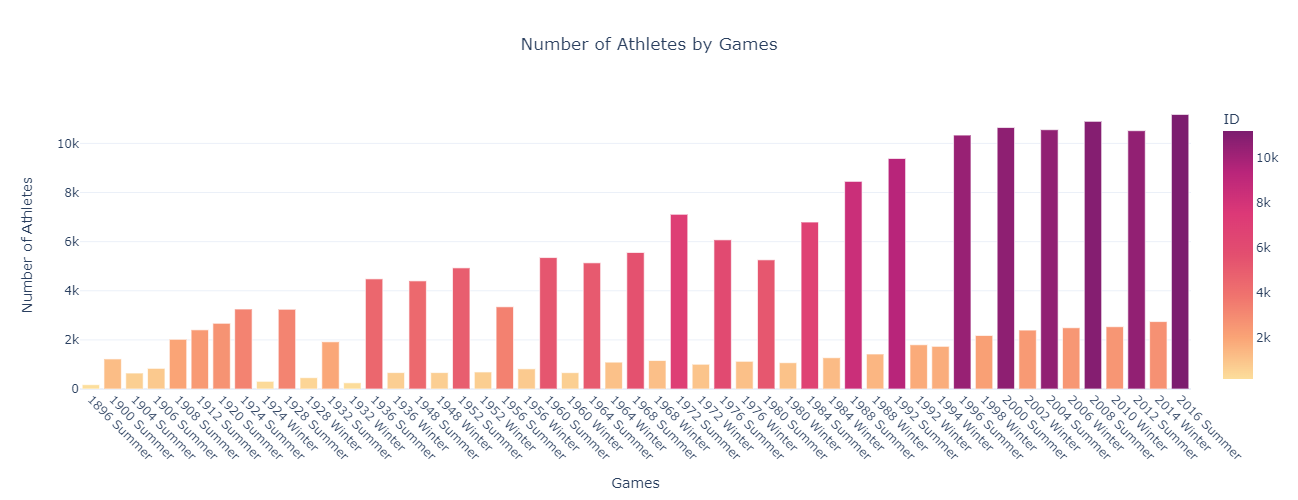

In [35]:

fig = px.bar(
    games_data,
    x='Games',
    y='ID',
    title='Number of Athletes by Games',
    color='ID', 
    color_continuous_scale='Sunsetdark'  
)

fig.update_layout(height = 500,
    xaxis_title='Games',
    yaxis_title='Number of Athletes',
    title_x=0.5, 
    xaxis_tickangle=45,
   
    template='plotly_white'  
)

fig.show()

### 2. Age

In [34]:
df['Age'].skew()

1.747122537787137

A skewness of 1.747 indicates that the distribution of the Age data is significantly positively skewed. 

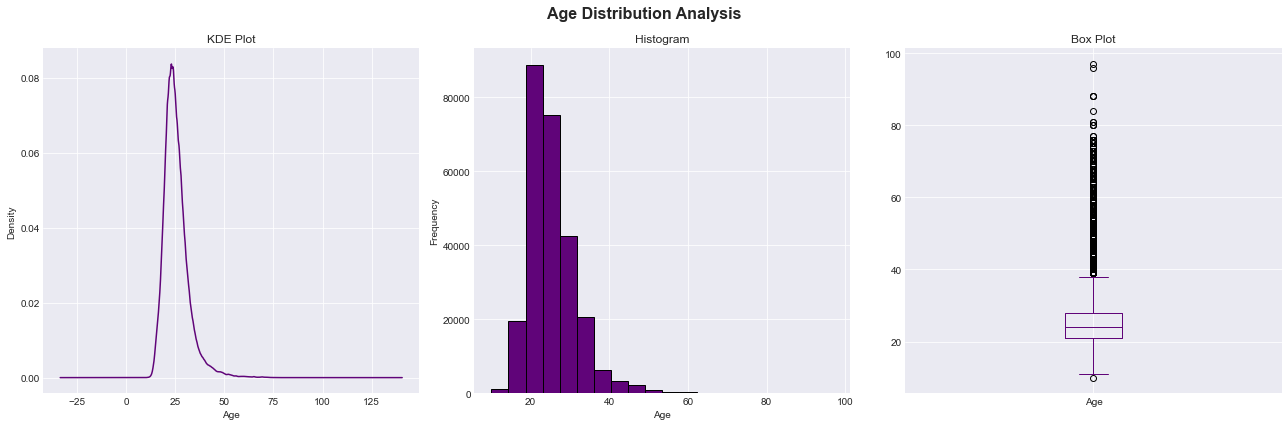

In [43]:
sunset_dark_color = '#600479'

plt.style.use('seaborn-v0_8-darkgrid')  
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# KDE plot
df['Age'].plot(kind='kde', ax=axes[0], title='KDE Plot', color=sunset_dark_color)
axes[0].set_xlabel('Age')

# Histogram
df['Age'].plot(kind='hist', bins=20, ax=axes[1],edgecolor='black', title='Histogram',color=sunset_dark_color)
axes[1].set_xlabel('Age')

# Box plot
df['Age'].plot(kind='box', ax=axes[2], title='Box Plot',color=sunset_dark_color)
axes[2].set_xlabel('')


fig.suptitle('Age Distribution Analysis', fontsize=16, weight='bold')

plt.tight_layout()


plt.show()

### 3. Gender

In [44]:
athletes_per_game_gender =df.groupby(['Games', 'Sex'])['ID'].nunique().reset_index()

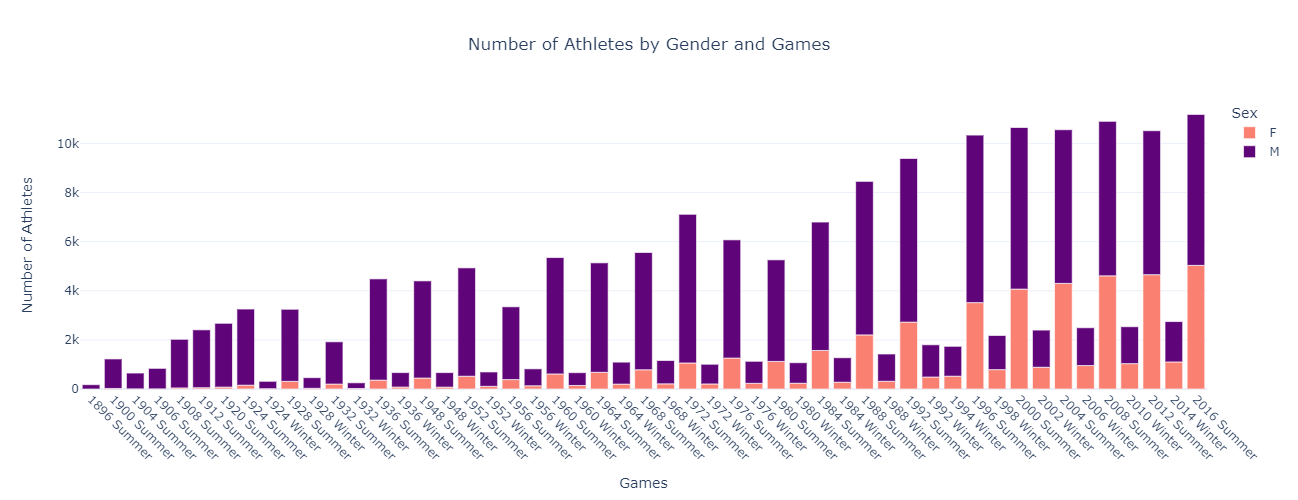

In [51]:
fig = px.bar(athletes_per_game_gender
    ,
    x='Games',
    y='ID',
    title='Number of Athletes by Gender and Games',
    color='Sex', 
    color_discrete_sequence= [ 'salmon', '#600479']  
)

fig.update_layout(height = 500,
    xaxis_title='Games',
    yaxis_title='Number of Athletes',
    title_x=0.5, 
    xaxis_tickangle=45,
   
    template='plotly_white'  
)

fig.show()

Countries that have participated in most Olympic Games - Switzerland, France, Italy and Great Britain.

In [52]:
df.groupby('NOC')['Games'].nunique().sort_values(ascending=False).reset_index().head(6)

,NOC,Games
0,SUI,51
1,FRA,51
2,ITA,51
3,GBR,51
4,AUT,50
5,USA,50


## Bivariate Analysis

### Top 10 countries who won most Gold medals

In [62]:
Gold_count = pd.crosstab(df['region'],df['Medal']).sort_values('Gold', ascending = False).reset_index().head(10)
Gold_count_top10 = Gold_count[['region', 'Gold']].head(10)
Gold_count_top10


Medal,region,Gold
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575
5,France,501
6,Sweden,479
7,Canada,463
8,Hungary,432
9,Norway,378


### Top 5 sports which have won the highest number of gold medals in the Olympics.

In [66]:
Sports_gold = pd.crosstab(df['Sport'],df['Medal']).sort_values('Gold', ascending = False).reset_index().head(5)
Sports_gold_top5 = Sports_gold[['Sport', 'Gold']]
Sports_gold_top5

Medal,Sport,Gold
0,Athletics,1339
1,Swimming,1099
2,Rowing,978
3,Gymnastics,791
4,Fencing,594


### Age and medal comparisions

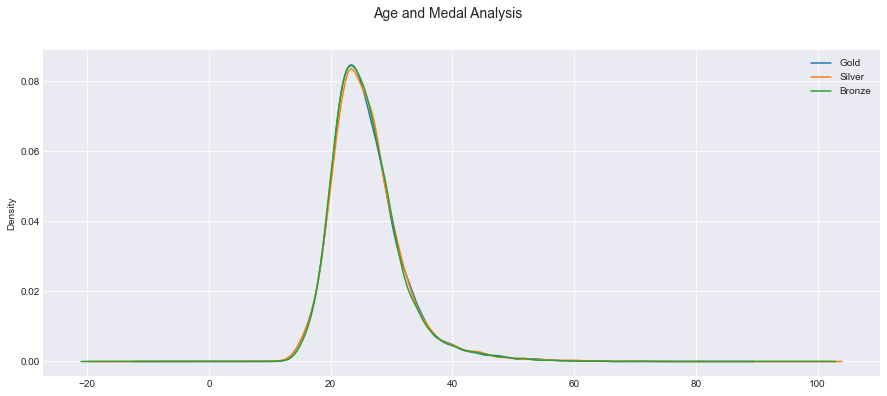

In [67]:
plt.figure(figsize=(15, 6))

df[df['Medal']=='Gold']['Age'].plot(kind = 'kde',label='Gold')
df[df['Medal']=='Silver']['Age'].plot(kind = 'kde',label='Silver')
df[df['Medal']=='Bronze']['Age'].plot(kind = 'kde',label='Bronze')
plt.suptitle('Age and Medal Analysis', fontsize=14)
plt.legend()
plt.show()

Feature Engineering

Assigning continents to the countries and make a new column

In [68]:
asia_nocs = ['CHN', 'IRI', 'AZE', 'TUR', 'JPN', 'KSA', 'IND', 'SYR', 'MDV', 'UAE', 'YAR', 'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'KAZ', 'BRU', 'MAS', 'THA', 'KOR', 'VNM', 'MGL', 'AFG', 'NEP', 'BHU', 'KIR', 'PRK', 'CAM', 'SOL', 'SEN', 'CPV', 'CRT', 'GEQ', 'TPE', 'RHO', 'STP', 'MYA', 'MAW', 'ZAM', 'TGA', 'FSM', 'MHL', 'YEM', 'IOA', 'OMA', 'FIJ', 'VAN', 'MDA', 'KIR', 'UNK', 'TUV']
europe_nocs = ['DEN', 'NED', 'FIN', 'NOR', 'ROU', 'EST', 'FRA', 'BUL', 'ITA', 'BGR', 'RUS', 'BLR', 'GRE', 'HUN', 'POL', 'IRL', 'GER', 'SUI', 'FRG', 'GDR', 'MON', 'ISR', 'UKR', 'GBR', 'LAT', 'NIG', 'MLI', 'POL', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM', 'LBR', 'SUR', 'NEP', 'MGL', 'AUT', 'PLW', 'LTU', 'TOG', 'NAM', 'AHO', 'ISL', 'ASA', 'SAM', 'MLT', 'CYP', 'GUI', 'BIZ', 'YMD', 'GEO', 'SLO', 'CRO', 'NZL', 'POR', 'PAR', 'VEN', 'COL', 'PER', 'ESA', 'PUR', 'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY', 'TCH', 'LUX', 'MTN', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM', 'LBR', 'SUR', 'NEP']
north_america_nocs = ['USA', 'CUB', 'MEX', 'CAN', 'NCA', 'CRC', 'PAN', 'ESA', 'PUR', 'HON', 'GUA', 'SRB', 'IVB', 'MOZ', 'CAF', 'MAD', 'MAL', 'BIH', 'GUM', 'CAY', 'SVK', 'BAR', 'GBS', 'TLS', 'COD', 'GAB', 'SMR', 'LAO', 'BOT', 'ROT', 'CAM', 'PRK', 'SOL', 'SEN', 'CPV', 'CRT', 'GEQ', 'BOL', 'SAA', 'AND', 'ANT', 'ZIM', 'GRN', 'HKG', 'LCA', 'FSM', 'MYA', 'MAW', 'ZAM', 'RHO', 'TPE', 'STP', 'MKD', 'BOH', 'TGA', 'LIE', 'MNE', 'GAM', 'COK', 'ALB', 'WIF', 'SWZ', 'BUR', 'NBO', 'BDI', 'ARU', 'NRU', 'VNM', 'VIE', 'BHU', 'MHL', 'KIR', 'UNK', 'TUV', 'NFL', 'KOS', 'SSD', 'LES']
south_america_nocs = ['ARG', 'BRA', 'COL', 'VEN', 'PER', 'ESA', 'PUR', 'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY', 'TCH', 'LUX', 'MTN', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM', 'LBR', 'SUR', 'NEP', 'MGL', 'AUT', 'PLW', 'LTU', 'TOG', 'NAM', 'AHO', 'ISL', 'ASA', 'SAM', 'RWA', 'DMA', 'HAI', 'MLT', 'CYP', 'GUI', 'BIZ', 'YMD', 'KOR', 'THA', 'BER', 'ANZ', 'SCG', 'SLE', 'PNG', 'YEM', 'IOA', 'OMA', 'FIJ', 'VAN', 'MDA', 'YUG', 'BAH', 'GUA', 'SRB', 'IVB', 'MOZ', 'CAF', 'MAD', 'MAL', 'BIH', 'GUM', 'CAY', 'SVK', 'BAR', 'GBS', 'TLS', 'COD', 'GAB', 'SMR', 'LAO', 'BOT', 'ROT', 'CAM', 'PRK', 'SOL', 'SEN', 'CPV', 'CRT', 'GEQ', 'BOL', 'SAA', 'AND', 'ANT', 'ZIM', 'GRN', 'HKG', 'LCA', 'FSM', 'MYA', 'MAW', 'ZAM', 'RHO', 'TPE', 'STP', 'MKD', 'BOH', 'TGA', 'LIE', 'MNE', 'GAM', 'COK', 'ALB', 'WIF', 'SWZ', 'BUR', 'NBO', 'BDI', 'ARU', 'NRU', 'VNM', 'VIE', 'BHU', 'MHL', 'KIR', 'UNK', 'TUV', 'NFL', 'KOS', 'SSD', 'LES']
africa_nocs = ['EGY', 'MAR', 'SUD', 'ALG', 'KEN', 'BEN', 'GHA', 'SOM', 'CIV', 'MLI', 'NGR', 'UGA', 'CMR', 'TUN', 'LIB', 'NGA', 'SEN', 'TGO', 'ZIM', 'BOT', 'NAM', 'GAB', 'SSD', 'MDG', 'TGO', 'CIV', 'GHA', 'UGA', 'STP', 'TZA', 'ZAF', 'COM', 'MAUR', 'ETH', 'SOM', 'MWI', 'ZAM', 'LSO', 'SWZ', 'STP']

def get_continent(noc):
    if noc in asia_nocs:
        return 'Asia'
    elif noc in europe_nocs:
        return 'Europe'
    elif noc in north_america_nocs:
        return 'North America'
    elif noc in south_america_nocs:
        return 'South America'
    elif noc in africa_nocs:
        return 'Africa'
    else:
        return 'Other'

# Create the 'Continent' column
df['Continent'] = df['NOC'].apply(get_continent)

In [69]:
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,Continent
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,Asia
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,Asia
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,Europe


In [71]:
temp_df = df.groupby(['Continent','Games'])['Medal'].count().reset_index().sort_values('Games')


### Medals Count per Continent across Olympic Games

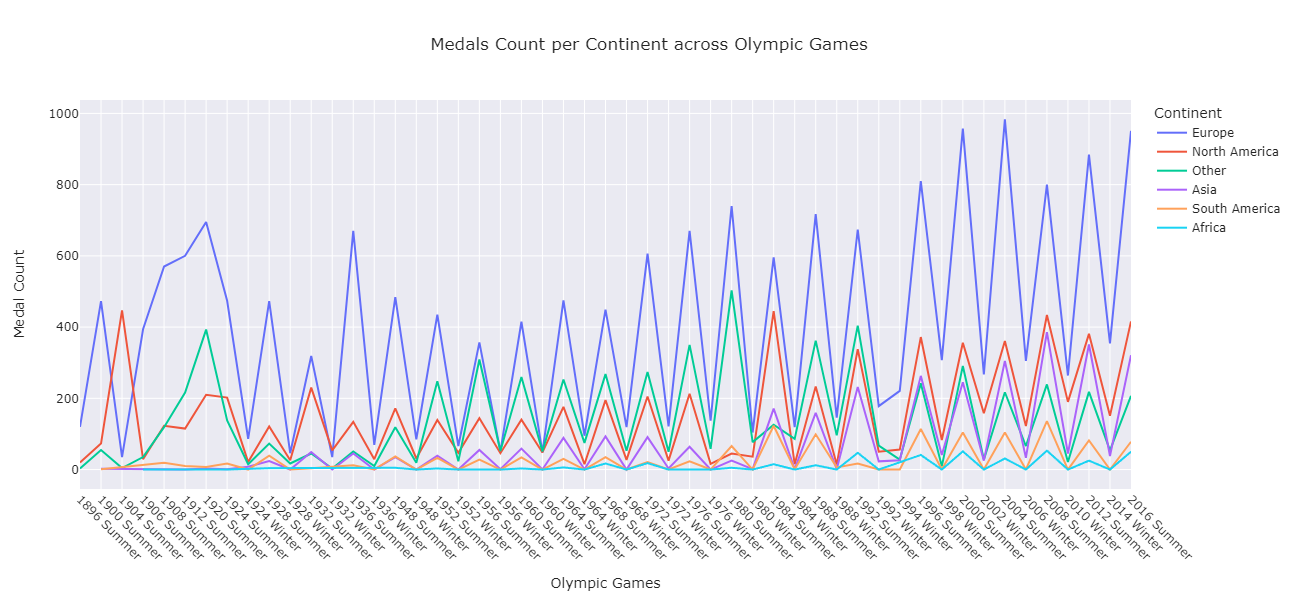

In [72]:
fig = px.line(
    temp_df, 
    x='Games', 
    y='Medal', 
    color='Continent', 
    title='Medals Count per Continent across Olympic Games',
    labels={'Games': 'Olympic Games', 'Medal': 'Medal Count'},
    
)

fig.update_layout(
    xaxis_tickangle=45,
    title_x=0.5,
    template='seaborn', 
    height=600, width = 1100, 
    legend_title="Continent",
)

fig.show()

### Top 10 countries by total medals 

In [136]:
df['Medal_count'] = df['Medal'].replace('Unknown', 0)

In [137]:
def no_medals(value):
    if value == 'Gold':
        return 1
    elif value == 'Silver':
        return 1
    elif value == 'Bronze':
        return 1
    else:
        return 0

In [138]:
df['Medal_count'] = df['Medal'].apply(no_medals)

In [139]:
Total_medal_data = pd.pivot_table(df,
                              index='region',
                              columns='Games',
                              values='Medal_count',
                              aggfunc='sum', fill_value=0)

In [140]:
Total_medal_data['Total']= Total_medal_data.sum(axis=1)

In [144]:
temp_df3 = Total_medal_data.sort_values(by='Total', ascending=False).head(10)

C:\Users\Asus\AppData\Local\Temp\ipykernel_30792\2449638948.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




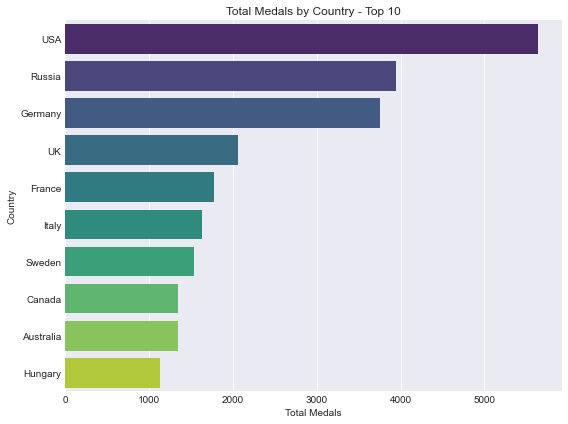

In [146]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Total', y='region', data=temp_df3, orient='h', palette='viridis')

# Add labels and title
plt.xlabel('Total Medals')
plt.ylabel('Country')
plt.title('Total Medals by Country - Top 10')

# Adjust layout to avoid tight labels
plt.tight_layout()

plt.show()

### Number of medals in each criteria per continent over a timeline

In [83]:
temp_df5 = df.groupby(['Continent', 'Games', 'Medal']).size().reset_index(name='Count')

In [84]:
medal_counts_temp_df5 =temp_df5.pivot_table(index=['Continent', 'Games'],
                                              columns='Medal',
                                              values='Count',
                                              fill_value=0).reset_index()

In [95]:
#medal_counts_temp_df5

In [88]:
#medal_counts_temp_df5 = medal_counts_temp_df5.drop('Unknown', axis=1)

In [89]:
df_updated = pd.melt(medal_counts_temp_df5 , id_vars=['Continent', 'Games'], value_vars=['Gold', 'Silver', 'Bronze'],
                  var_name='Medal_Type', value_name='Medal_Count')


In [90]:
df_updated['Total_Medals'] = df_updated.groupby(['Games', 'Continent'])['Medal_Count'].transform('sum')

In [91]:
df_updated = df_updated.sort_values(by=['Games', 'Total_Medals'], ascending=[True, False])

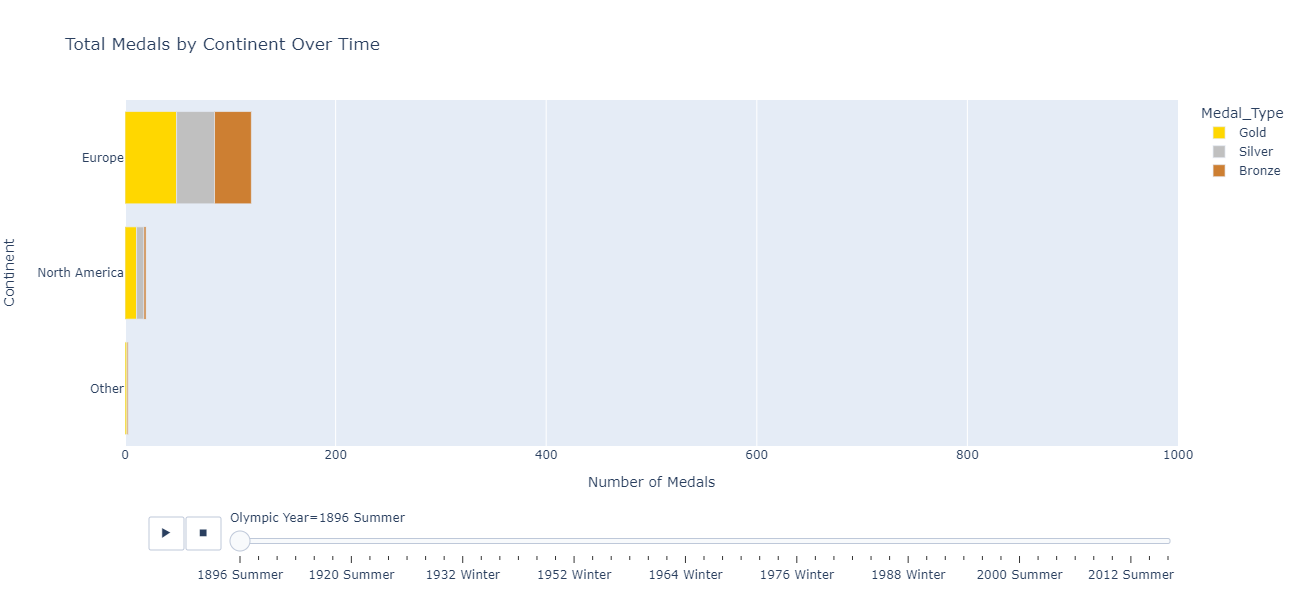

In [148]:
fig = px.bar(df_updated,
             x='Medal_Count',  # Medal count on the x-axis
             y='Continent',       # Countries (regions) on the y-axis
             color='Medal_Type',  # Color by medal type (Gold, Silver, Bronze)
             orientation='h',    # Horizontal bar chart
             animation_frame='Games',  # Animate by Games (Olympic year)
             title="Total Medals by Continent Over Time",
             labels={'Medal_Count': 'Number of Medals', 'Games': 'Olympic Year'},
             color_discrete_map={'Gold': '#FFD700', 'Silver': '#C0C0C0', 'Bronze': '#CD7F32'},  # Medal colors
             height=600, range_x=[0,1000])  # Adjust height to prevent stretching

fig.update_yaxes(
    categoryorder='total ascending'),  # Set category order to custom sorted list



# Show the plot
fig.show()

### Medals by countries over time

A new df with latitude and longitude coordinates are merged to form the charts.

In [162]:
cord = pd.read_csv("Downloads/Lat and lonLSLK - country-coord.csv")

In [163]:
medal_counts = df.groupby(['region', 'Games', 'Medal']).size().reset_index(name='Count')
medal_counts_pivot = medal_counts.pivot_table(index=['region', 'Games'],
                                              columns='Medal',
                                              values='Count',
                                              fill_value=0).reset_index()


In [164]:
df_long = pd.melt(medal_counts_pivot, id_vars=['region', 'Games'], value_vars=['Gold', 'Silver', 'Bronze'],
                  var_name='Medal_Type', value_name='Medal_Count')
df_long['Total_Medals'] = df_long.groupby(['Games', 'region'])['Medal_Count'].transform('sum')
df_long = df_long.sort_values('Games')

In [165]:
F_df = df_long.merge(cord,left_on = 'region', right_on = 'Country', how = 'left')

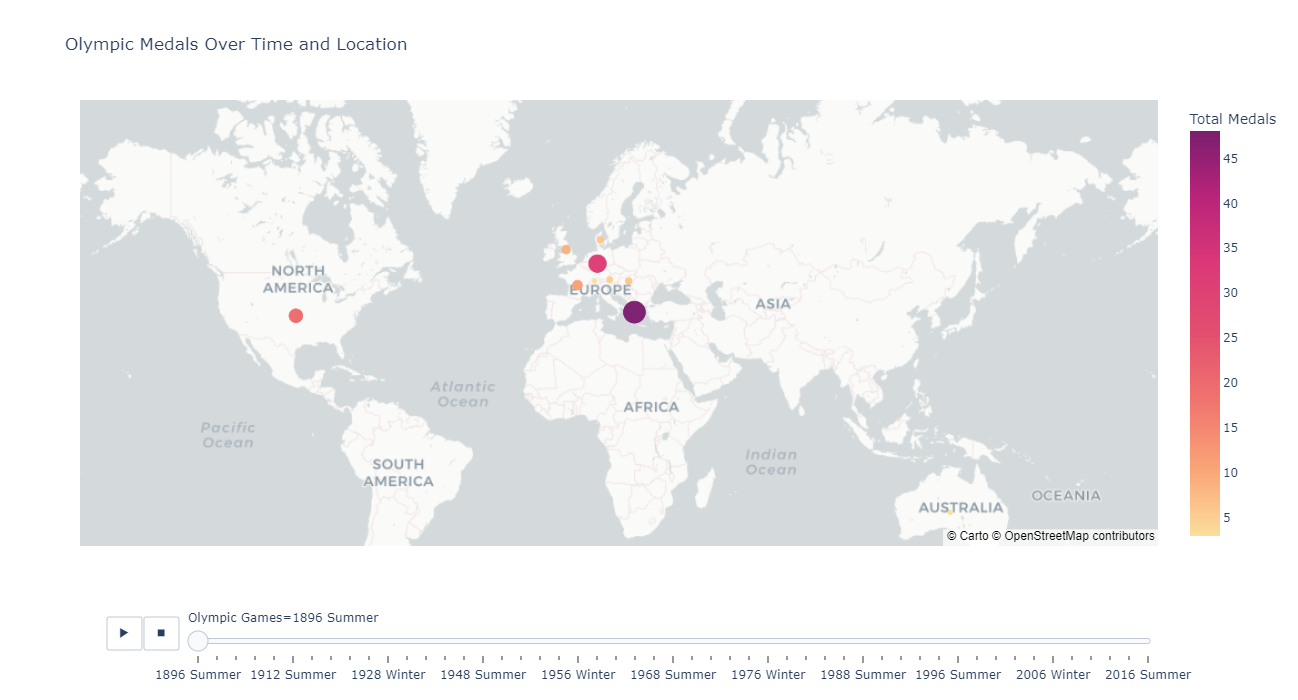

In [166]:
fig = px.scatter_mapbox(
    F_df,
    lat="Latitude (average)",
    lon="Longitude (average)",
    
    color="Total_Medals",
    size="Total_Medals",
    height = 700,
    size_max=50,           # Adjust size scale for 'deaths'
    color_continuous_scale='Sunsetdark',               
    zoom=1,
     mapbox_style="carto-positron",
    animation_frame="Games",  # Add timeline animation
    
    hover_name="Country",
    title="Olympic Medals Over Time and Location",
    labels={
        "Medal_Type": "Type of Medal",
        "Total_Medals": "Total Medals",
        "Games": "Olympic Games"
    }
)


# Show combined chart
fig.show()

### Types of Olympic Medals by Countries over Time

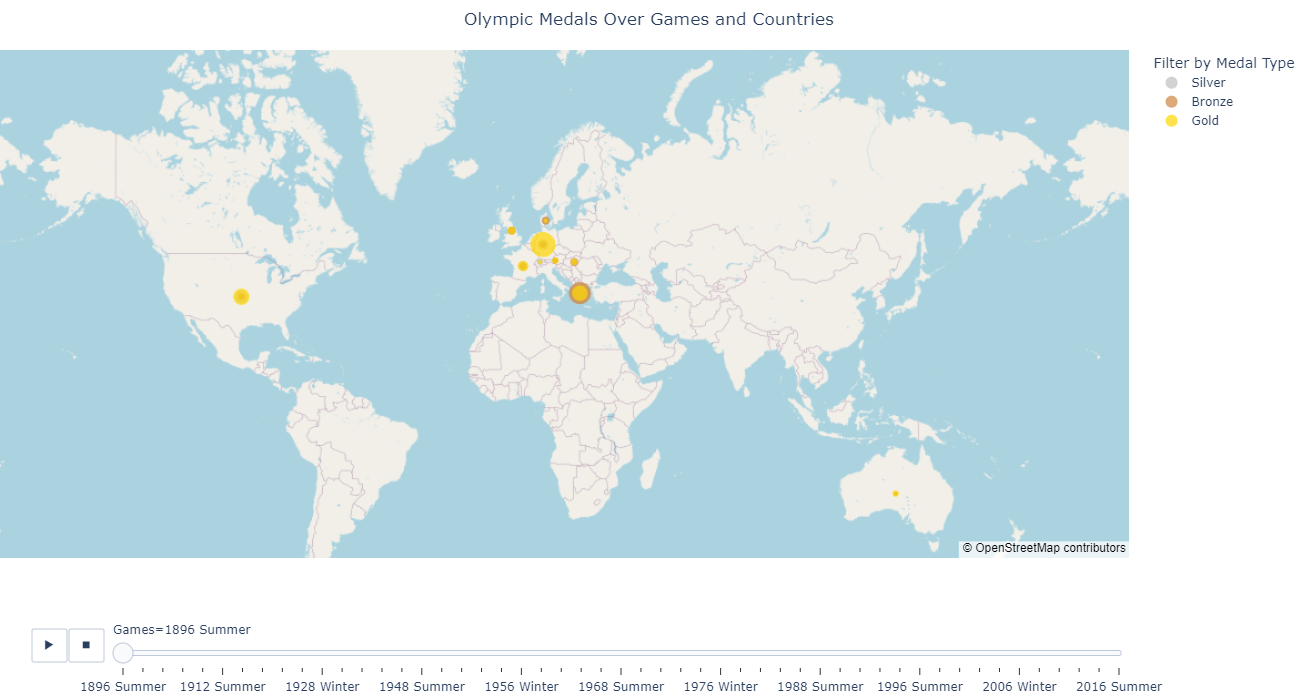

In [167]:
medal_colors = {
    'Gold': 'gold',
    'Silver': 'silver',
    'Bronze': 'peru'
}

# Create the scatter map
fig = px.scatter_mapbox(
    F_df,
    lat="Latitude (average)",
    lon="Longitude (average)",
    color="Medal_Type",  # Use Medal_Type for the legend
    size="Medal_Count",  # Size the points by total medals
    size_max=50,
    animation_frame="Games",  # Use Games as the timeline
    color_discrete_map=medal_colors,  # Apply the custom color map
    mapbox_style='open-street-map',
    zoom=1,
    hover_name="Country",
    title="Olympic Medals Over Games and Countries",
    
)

# Update layout for better visual filtering and aesthetics
fig.update_layout(
    height=700,
    margin={"r": 0, "t": 50, "l": 0, "b": 0},
    title_x=0.5,  # Center the title
    legend_title="Filter by Medal Type"  # Legend title
)

# Show the plot
fig.show()

### Countries participating in summer and winter

In [96]:
Season_df = df.groupby(['Year','Season'])['region'].nunique().reset_index()
Season_df = Season_df[Season_df['region'] != 0]

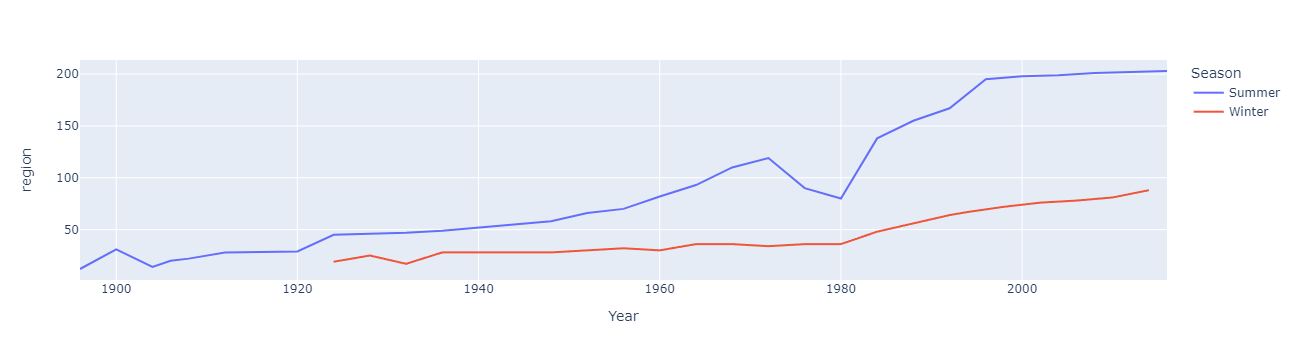

In [97]:
px.line(Season_df, x = 'Year', y = 'region', color = 'Season')

### Number of athletes per season 

In [98]:
Athletes_df = df.groupby(['Year','Season'])['ID'].nunique().reset_index()
Athletes_df = Athletes_df[Athletes_df['ID'] != 0]

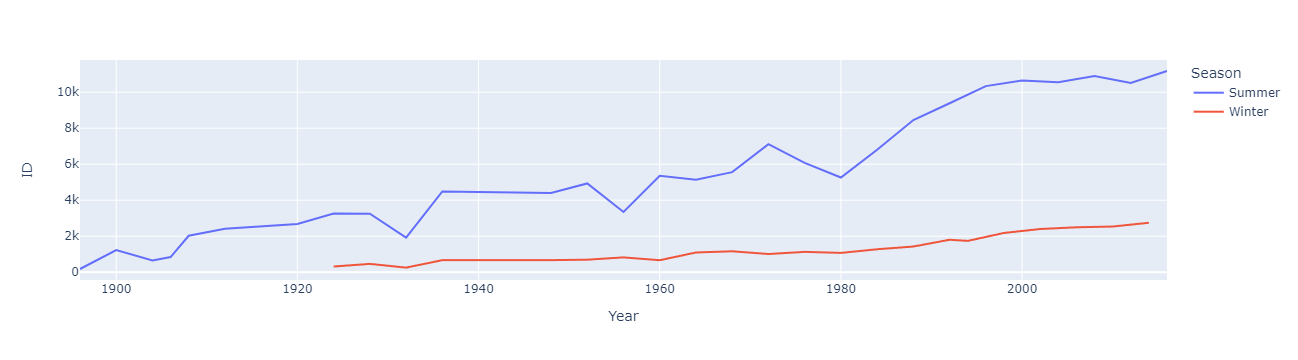

In [99]:
px.line(Athletes_df, x = 'Year', y = 'ID', color = 'Season')

### Number of athletes per continent

In [100]:
Athletes_df1 = df.groupby(['Games','Continent'])['ID'].nunique().reset_index()

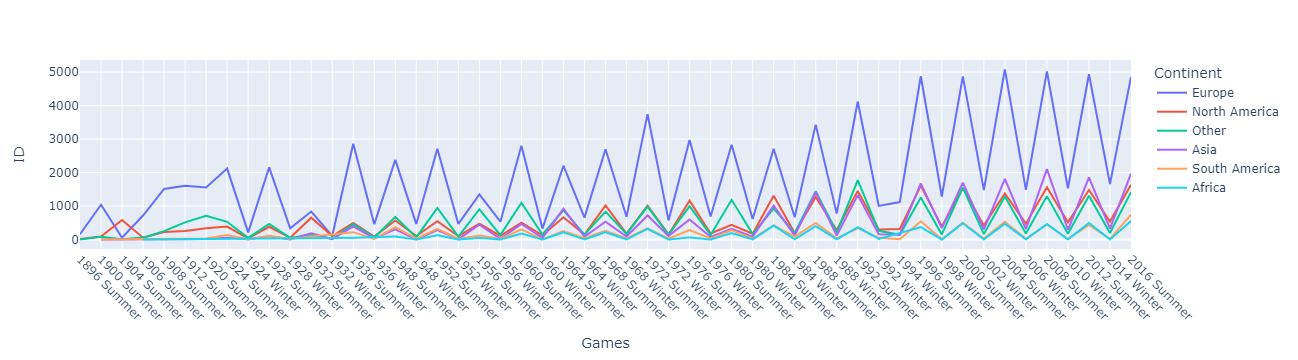

In [154]:
fig = px.line(Athletes_df1, x = 'Games', y = 'ID', color = 'Continent')

fig.update_layout(
    xaxis_tickangle=45)

### Top 3 countries in each Sport


In [106]:
Sport= df.groupby(['region','Sport'])['Medal_count'].count().reset_index()
Sport = Sport.sort_values(['Medal_count','Sport'],ascending=[False,True])


In [107]:
top_5_df = Sport.groupby('Sport').apply(lambda x: x.nlargest(3, 'Medal_count')).reset_index(drop=True)


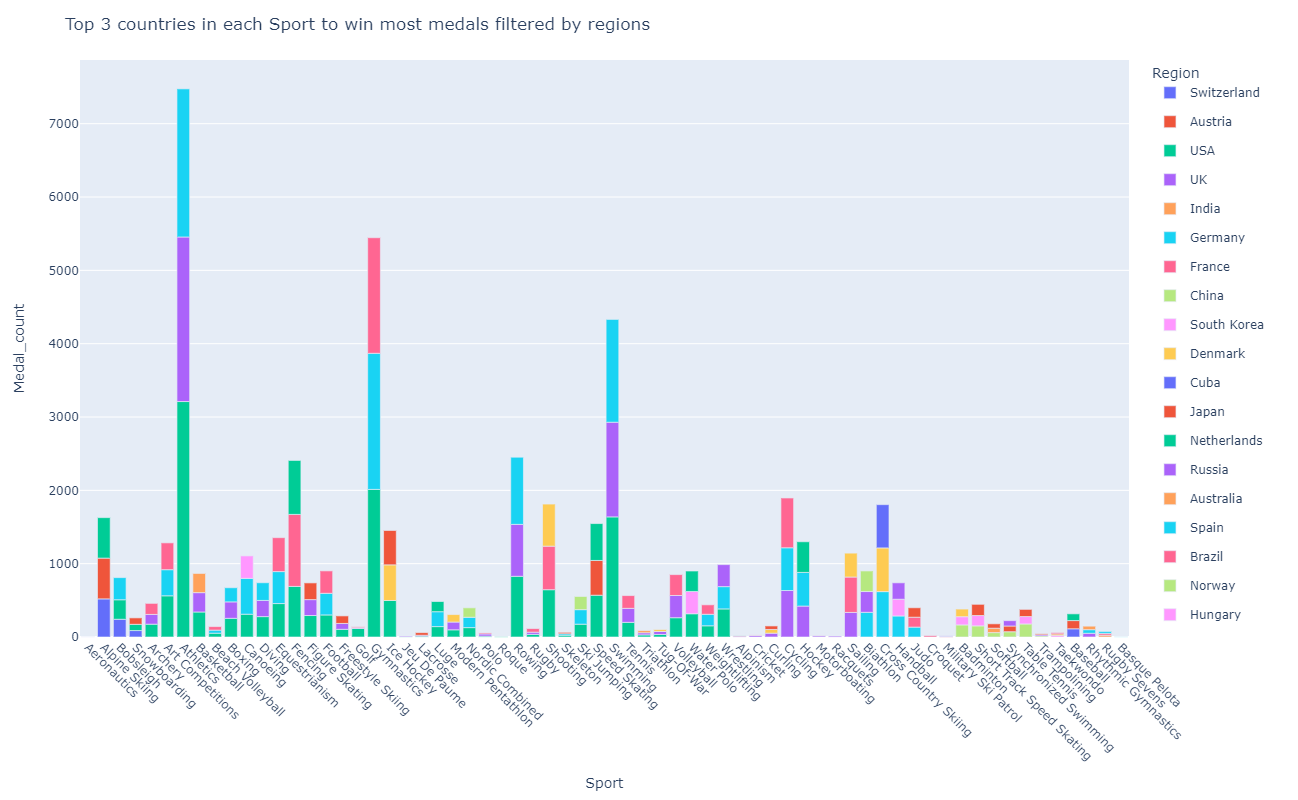

In [161]:

fig = px.bar(top_5_df, x = 'Sport', y = 'Medal_count', color = 'region' )
fig.update_layout(
    legend_title='Region',
    height = 800,
    showlegend=True,
    title = 'Top 3 countries in each Sport to win most medals filtered by regions',
    xaxis_tickangle=45,
    legend=dict(
        itemclick='toggleothers',  
        tracegroupgap=10 
    ),
    
)

fig.show()

### Top 10 Players who won the most medals (eliminating unknown medals)

In [111]:
player_medal_counts = df.groupby(['Name'])['Medal_count'].sum().reset_index().sort_values('Medal_count', ascending = False).head(10)

In [112]:
player_medal_counts

,Name,Medal_count
86745,"Michael Fred Phelps, II",28
73140,Larysa Semenivna Latynina (Diriy-),18
93738,Nikolay Yefimovich Andrianov,15
118712,Takashi Ono,13
16202,Borys Anfiyanovych Shakhlin,13
95141,Ole Einar Bjrndalen,13
29509,Edoardo Mangiarotti,13
91718,Natalie Anne Coughlin (-Hall),12
111837,Sawao Kato,12
24893,"Dara Grace Torres (-Hoffman, -Minas)",12


In [134]:
# F_df.to_excel('olympic.xlsx')

### Athletes who played the most Olympic Seasons

In [135]:
df.groupby(['ID','Name'])['Games'].nunique().reset_index().sort_values('Games',ascending = False).head(10)

,ID,Name,Games
79854,79855,Ian Millar,10
99154,99155,Hubert Raudaschl,9
65377,65378,Afanasijs Kuzmins,9
32457,32458,Paul Bert Elvstrm,8
104878,104879,Nino Salukvadze (-Machavariani),8
61571,61572,Durward Randolph Knowles,8
51617,51618,Josefa Idem-Guerrini,8
119964,119965,Lesley Allison Thompson-Willie,8
26879,26880,Rajmond Debevec,8
28051,28052,Raimondo D'Inzeo,8
